<center>
<h1>CSCI3151 - Foundations of Machine Learning</h1>
<h1>Assignment 4</h1>
Summer 2021
</center>

Your assignment is to be submitted as a single `.ipynb` file **(please do not zip it when submitting to brightspace)** including your answers to both the math and the experimental questions, in the correct order, on Brightspace. Use [markdown syntax](https://www.markdownguide.org/cheat-sheet/) to format your answers

Note: in solving the math questions, aim for general (symbolic) solutions and substitute the specific numbers at the end. This demonstrates a solid understanding of the key concepts. 
You can answer the math questions in two ways:
*   **Use LaTeX to typeset the equations**. Section H of [this LaTeX reference sheet](http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf) is a good reference. Here is another [LaTeX reference sheet](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference).
The equations in the questions are typeset in LaTeX, so you can use them as examples. 
*   **Use neat handwriting**, scan your solution using [Camscanner](https://www.camscanner.com/user/download) on your mobile phone, upload the image file, and embed it in your solution notebook. To this end (1) create an empty Markdown cell. 2) Drag-and-drop the image file into the empty Markdown cell, or click on the image icon at the top of the cell and select the image file. The Markdown code that will embed the image, together with its content, then appears.   


Your answers to the experimental questions should be in your solution notebook, in the form of code and text cells, using markdown for your text responses. You should also include the results of running your code. 

The marking criteria are described in rubrics. 

You can submit multiple editions of your assignment. Only the last one will be marked. It is recommended to upload a complete submission, even if you are still improving it, so that you have something into the system if your computer fails for whatever reason.  

**IMPORTANT**: PLEASE NAME YOUR PYTHON NOTEBOOK FILE AS: 
* `<LAST_NAME>-<FIRST_NAME>-Assignment-N.ipynb`

for example: **Soto-Axel-Assignment-4.ipynb** \\


## **1. Clustering**









 

In this question we are going to explore two different clustering methods on the [Wine Dataset](https://archive.ics.uci.edu/ml/datasets/Wine) and evaluate it using two measures: one is an intrinsic measure (no labels), while the other one makes use of the available labels.


In [ ]:
from sklearn.datasets import load_wine
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler

def load_dataset():
  scalar = StandardScaler()
  wine_dataset = load_wine()

  X = scalar.fit_transform(wine_dataset.data)
  y = wine_dataset.target

  return X, y

a) Cluster the dataset using the [Agglomerative Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html), and [k-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) clustering algorithm without using the class information as part of the features. Experiment with different numbers of clusters ranging from 2 to 5. 



In [ ]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

def cluster_metrics(cls, X, y, n_clusters = 2):
  pred = cls(n_clusters=n_clusters).fit_predict(X)
  silhouette_cof = silhouette_score(X, pred)
  adj_rand_index = adjusted_rand_score(y, pred)
  return n_clusters, silhouette_cof, adj_rand_index

b) What is the variability of the resulting clusters as a function of different initializations or parameterization? Use the Silhouette coefficient and Adjusted Rand Index as metrics for evaluation to discuss the stability of results.

In [ ]:
X, y = load_dataset()

for cls in (AgglomerativeClustering, KMeans):
  for i in range(2, 6):
      cluster = cluster_metrics(cls, X, y, n_clusters=i)
      print(f"-- {cls.__name__}, No. of Clusters = {cluster[0]} --")
      print(f"-- Silhoutte Coefficient -- ")
      print(f"{cluster[1]}")
      print(f"-- Adjusted Rand Index --")
      print(f"{cluster[2]}")
      print()

-- AgglomerativeClustering, No. of Clusters = 2 --
-- Silhoutte Coefficient -- 
0.2670131771272231
-- Adjusted Rand Index --
0.4394391043947633

-- AgglomerativeClustering, No. of Clusters = 3 --
-- Silhoutte Coefficient -- 
0.2774439826952266
-- Adjusted Rand Index --
0.7899332213582837

-- AgglomerativeClustering, No. of Clusters = 4 --
-- Silhoutte Coefficient -- 
0.22583665933475802
-- Adjusted Rand Index --
0.6568168355341232

-- AgglomerativeClustering, No. of Clusters = 5 --
-- Silhoutte Coefficient -- 
0.18674235566758707
-- Adjusted Rand Index --
0.5830332574134743

-- KMeans, No. of Clusters = 2 --
-- Silhoutte Coefficient -- 
0.2683134097105212
-- Adjusted Rand Index --
0.38872424979619347

-- KMeans, No. of Clusters = 3 --
-- Silhoutte Coefficient -- 
0.2848589191898987
-- Adjusted Rand Index --
0.8974949815093207

-- KMeans, No. of Clusters = 4 --
-- Silhoutte Coefficient -- 
0.2385913610731847
-- Adjusted Rand Index --
0.7543095730834788

-- KMeans, No. of Clusters = 5 --

# Summary

Its evident from the results above that as the the number of clusters approaches 3, we begin to derive an optimal model. Likewise, as we move further away from 3, we begin to diverge from the optimal model. 

When the number of clusters = 3, our adjusted rand index is ~0.79, which indicates a strong similarity between the true clustering and the predicted cluster. Additionally, a silhoutte coefficient of ~ 0.27 exists which indicates overlap between two clusters. As both of these metrics are optimal, we can state that the true clustering is likely placed in one of 3 classes.



c) Based on the Silhouette coefficient, discuss (i) which clustering method you would pick, (ii) how many clusters you would use for your data.

Make sure that appropriate visualizations are used to support the analysis.


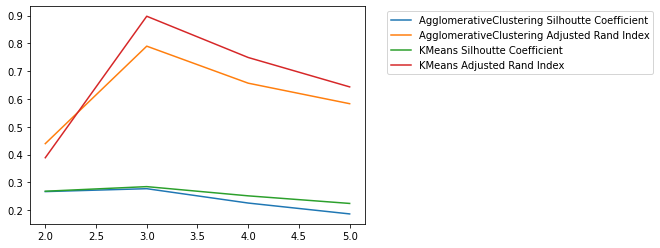

In [ ]:
import matplotlib.pyplot as plt

X, y = load_dataset()

fig, ax = plt.subplots()
X_range = list(range(2,6))
for cls in (AgglomerativeClustering, KMeans):

  data = [cluster_metrics(cls, X, y, n_clusters=i) for i in X_range] 
  sils = [d[1] for d in data]
  rand = [d[2] for d in data]

  ax.plot(X_range, sils, label=f"{cls.__name__} Silhoutte Coefficient")
  ax.plot(X_range, rand, label=f"{cls.__name__} Adjusted Rand Index")


ax.legend(bbox_to_anchor=(1.05, 1))

# Analysis

(i) I would choose K Means clustering as the algorithm performs better based on silhoutette coefficient.

(ii) For both clusters, we see an optimal silhoutte coefficient. When $N < 3$ the metrics reach optimal whereas when $N > 3$ the metrics begin to deviate from optimal, indicating that models with a greater number of clusters will begin to predict inputs incorrectly.



## **2. Convolutional neural networks**

In this question you will construct a convolutional neural network to classify a large set of low resolution images. Similarly to what you have done with A2, we would like you to describe the behavior of the network as you modify certain parameters.

Use the fashion_mnist dataset (available from Keras):



#####Understanding the dataset


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(x_train_original, y_train_original), (x_test_original, y_test_original) = fashion_mnist.load_data()

# Normalize data.
x_train = x_train_original/ 255.
x_test = x_test_original / 255.

In [ ]:
print("Training data shape: ", x_train_original.shape)
print("Training labels shape: ", y_train_original.shape)
print("Test data shape: ", x_test_original.shape)
print("Test labels shape: ", y_test_original.shape)

Training data shape:  (60000, 28, 28)
Training labels shape:  (60000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)


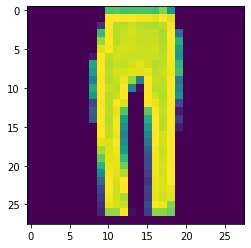

In [ ]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(x_test[64])
plt.show()

###a) Using two convolutional layers explore the impact on different choices for the number of nodes and filter sizes for the two layers. Summarize your observations.


2 ((8, 8), (8, 8))
2 ((2, 2), (2, 2))
2 (4, 4)
(8, 8) (2, 2)
(16, 16) (2, 2)
Epoch 1/4
59/59 [==============================] - 19s 314ms/step - loss: 1.2164 - accuracy: 0.6237 - val_loss: 0.5391 - val_accuracy: 0.8113
Epoch 2/4
59/59 [==============================] - 18s 309ms/step - loss: 0.4974 - accuracy: 0.8284 - val_loss: 0.4643 - val_accuracy: 0.8331
Epoch 3/4
59/59 [==============================] - 18s 308ms/step - loss: 0.4263 - accuracy: 0.8519 - val_loss: 0.4349 - val_accuracy: 0.8478
Epoch 4/4
59/59 [==============================] - 18s 309ms/step - loss: 0.4002 - accuracy: 0.8609 - val_loss: 0.4096 - val_accuracy: 0.8567
Epoch 1/4
59/59 [==============================] - 28s 458ms/step - loss: 1.2661 - accuracy: 0.6123 - val_loss: 0.5369 - val_accuracy: 0.8108
Epoch 2/4
59/59 [==============================] - 27s 457ms/step - loss: 0.4796 - accuracy: 0.8343 - val_loss: 0.4427 - val_accuracy: 0.8452
Epoch 3/4
59/59 [==============================] - 27s 458ms/step - los

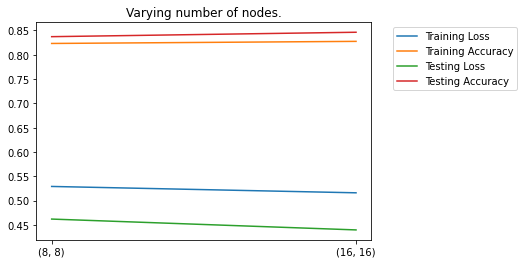

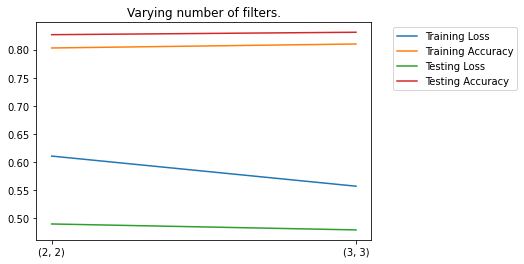

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, InputLayer
from keras.optimizers import Adam
import numpy as np
from tensorflow.keras.utils import to_categorical

def dataset_init():
  (x_train_original, y_train_original), (x_test_original, y_test_original) = fashion_mnist.load_data()

  Y_train = to_categorical(y_train_original)
  Y_test = to_categorical(y_test_original)

  X_train_norm = x_train_original.astype("float32") / 255.
  X_test_norm = x_test_original.astype("float32") / 255.
  
  return X_train_norm, Y_train, X_test_norm, Y_test

def build_network(n_nodes, filter_size):
  cnn = Sequential()
  print(n_nodes, filter_size)
  assert len(n_nodes) == len(filter_size), "No of nodes and filter size shape do not match."


  cnn.add(Conv2D(n_nodes[0], filter_size[0], activation="relu", input_shape=(28, 28, 1)))
  cnn.add(Conv2D(n_nodes[1], filter_size[1], activation="relu"))
  
  cnn.add(Flatten())
  cnn.add(Dense(10, activation="softmax"))

  cnn.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
  
  return cnn;

def train_network(network: Sequential, X, y, X_test, y_test, epochs=10):
  history = network.fit(np.expand_dims(X, -1), y, batch_size=1024, epochs=epochs, validation_data=(np.expand_dims(X_test, -1), y_test))
  return history.history

def plot_network(x_range, n_nodes, filter_size, epochs, X, y, X_test, y_test, title="Varying ..."):
  fig, ax = plt.subplots()

  assert len(n_nodes) == len(filter_size) == len(epochs) == len(x_range), "Shape of inputs not same."

  networks = [build_network(n_nodes[i], filter_size[i]) for i in range(len(x_range))]
  histories = [train_network(networks[i], X, y, X_test, y_test, epochs=epochs[i]) for i in range(len(x_range))]

  losses = [np.mean(history["loss"]) for history in histories]
  accuracies = [np.mean(history["accuracy"]) for history in histories]
  val_losses = [np.mean(history["val_loss"]) for history in histories]
  val_accuracies = [np.mean(history["val_accuracy"]) for history in histories]


  _range = [str(_x_range) for _x_range in x_range]
  print(losses, accuracies, val_losses, val_accuracies, range)

  assert len(_range) == len(losses), "Range != Losses"

  ax.plot(_range, losses, label="Training Loss")
  ax.plot(_range, accuracies, label="Training Accuracy")
  ax.plot(_range, val_losses, label="Testing Loss")
  ax.plot(_range, val_accuracies, label="Testing Accuracy")

  ax.legend(bbox_to_anchor=(1.05, 1))
  ax.set_title(f"{title}")


X_train, y_train, X_test, y_test = dataset_init()

n_nodes_default = ((8,)*2,)*2
filter_size_default = ((2,)*2,)*2
epochs_default = (4,)*2

n_nodes_increasing = ((8,)*2, (16,)*2)
filter_size_increasing = ((2,)*2, (3,)*2)

print(len(n_nodes_default), n_nodes_default)
print(len(filter_size_default), filter_size_default)
print(len(epochs_default), epochs_default)

plot_network(n_nodes_increasing, n_nodes_increasing, filter_size_default, epochs_default, X_train, y_train, X_test, y_test, "Varying number of nodes.")
plot_network(filter_size_increasing, n_nodes_default, filter_size_increasing, epochs_default, X_train, y_train, X_test, y_test, "Varying number of filters.")


# Summary

When our number of nodes reach approximately 16 nodes for each layer in our CNN, we begin to converge to an optimal model. 

Additionally, as we reduce the size of our filters used, we reduce losses for both our training and validation set, and increase our accuracies.

Using ~16 nodes and a size 3 filter will provide us our optimal model.

###b) For the hyperparameters for the layers that you determined in part (a), experiment with a higher number of epochs. Summarize your observations.


(8, 8) (2, 2)
(8, 8) (3, 3)
Epoch 1/4
59/59 [==============================] - 19s 313ms/step - loss: 1.5991 - accuracy: 0.6109 - val_loss: 0.5625 - val_accuracy: 0.8014
Epoch 2/4
59/59 [==============================] - 18s 307ms/step - loss: 0.5084 - accuracy: 0.8227 - val_loss: 0.4511 - val_accuracy: 0.8402
Epoch 3/4
59/59 [==============================] - 18s 308ms/step - loss: 0.4075 - accuracy: 0.8568 - val_loss: 0.4075 - val_accuracy: 0.8582
Epoch 4/4
59/59 [==============================] - 18s 306ms/step - loss: 0.3753 - accuracy: 0.8707 - val_loss: 0.3854 - val_accuracy: 0.8635
Epoch 1/4
59/59 [==============================] - 25s 408ms/step - loss: 1.4328 - accuracy: 0.5693 - val_loss: 0.5789 - val_accuracy: 0.7969
Epoch 2/4
59/59 [==============================] - 23s 392ms/step - loss: 0.5296 - accuracy: 0.8156 - val_loss: 0.4884 - val_accuracy: 0.8276
Epoch 3/4
59/59 [==============================] - 23s 392ms/step - loss: 0.4586 - accuracy: 0.8399 - val_loss: 0.4630 -

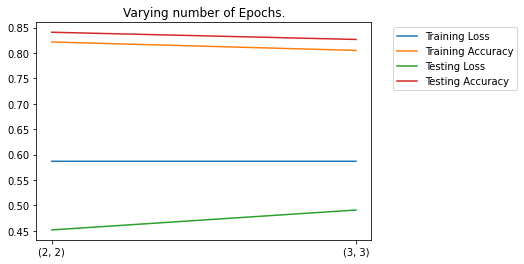

In [ ]:
n_nodes_optimal = ((16,)*2)*8
filter_size_optimal = ((3,)*2,)*8
epochs_increasing = (4 * i for i in range(1, 9))
plot_network(filter_size_increasing, n_nodes_default, filter_size_increasing, epochs_default, X_train, y_train, X_test, y_test, "Varying number of Epochs.")

# Summary

--

## **3. Recurrent Neural Networks**

In this question you will experiment with a simple recurrent neural network, where you will try to model a sinusoidal function with noise, whose amplitude becomes larger and larger as the independent variable t increases (0 ≤ t ≤ N). This function can be expressed in Python as:

`x=(np.sin(0.02*t)+2*np.random.rand(N))*(t/N)`. 

For N=5000 we have:

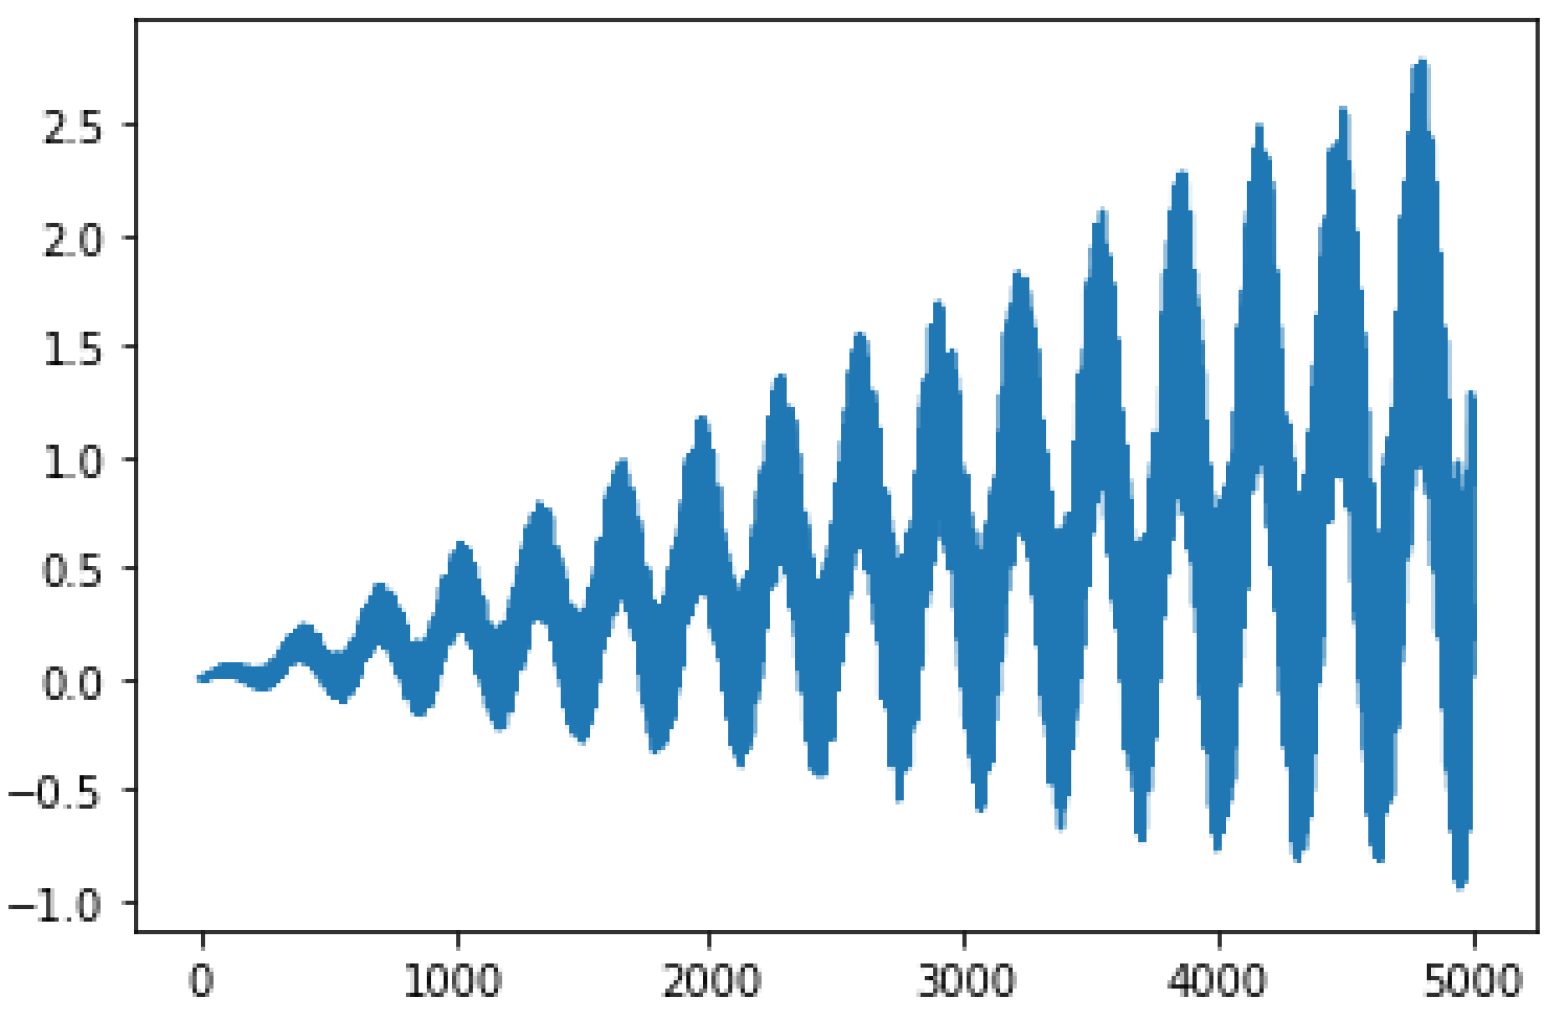

The idea is that you will train a recurrent neural network with points up to a certain value, Tp. This is all the training points will be t ≤ Tp . The length of the sequence provided to the network is a parameter that you can tune.



a) Complete the provided code to fulfill this task. You need to add at least one
simpleRNN layer and a proper output layer.
Compare the models with different numbers of RNN cells. [8, 16, 32, 64]

Choose the best number of internal nodes for this model.

In [175]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#sourced from this question description, transform data into matrix form
def putAsMatrix(data, length):
 X, Y =[], []
 for i in range(len(data)-length):
  d=i+length  
  X.append(data[i:d,])
  Y.append(data[d,])
 return np.array(X), np.array(Y)

def data_init(length=4,show_plot=True):
  #get the data
  N = 5000    
  Tp = 800    

  t=np.arange(0,N)
  x=(np.sin(0.02*t)+2*np.random.rand(N))*(t/N)
  df = pd.DataFrame(x)
  print(df.head())

  if show_plot:
    plt.plot(df)
    plt.show()

  values=df.values
  train,test = values[0:Tp,:], values[Tp:N,:]

  # add length elements into train and test
  test = np.append(test,np.repeat(test[-1,],length))
  train = np.append(train,np.repeat(train[-1,],length))
  
  trainX,trainY =putAsMatrix(train,length)
  testX,testY =putAsMatrix(test,length)
  trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
  testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
  print(trainX.shape, trainY.shape)

  return trainX, trainY, testX, testY


          0
0  0.000000
1  0.000088
2  0.000739
3  0.000887
4  0.001067


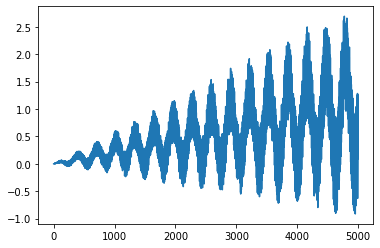

(800, 1, 4) (800,)


In [176]:
trainX, trainY, testX, testY = data_init()

In [180]:
def simpleRNN(units, length=4): #units is the number of recurrent nodes in your NN
  model = Sequential()
  #Include here the specification of your network
  #**********************************************
  #model.add(...)
  model.add(SimpleRNN(units))
  model.add(Dense(1))
  #...
  #**********************************************
  model.compile(loss='mean_squared_error', optimizer='rmsprop')
  model.fit(trainX, trainY, validation_data=(testX, testY))
  model.summary()

  model.fit(trainX,trainY, epochs=50, batch_size=16)
  trainPredict = model.predict(trainX)
  testPredict= model.predict(testX)
  predicted=np.concatenate((trainPredict,testPredict),axis=0)

  scores = model.evaluate(testX, testY, verbose=0)
  print(scores)

  #the vertical red line shows the point where testing data starts
  index = df.index.values
  plt.plot(df)
  plt.plot(index,predicted)
  plt.axvline(df.index[Tp], c="r")
  plt.title(f'Simple RNN with {units} RNN units with length {length}')
  plt.show()

25/25 [==============================] - 2s 37ms/step - loss: 0.0084 - val_loss: 0.3555
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_18 (SimpleRNN)    (None, 8)                 104       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 9         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
50/50 [==============================] - 1s 3ms/step - loss: 0.0065
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 6/50
50/50 [================

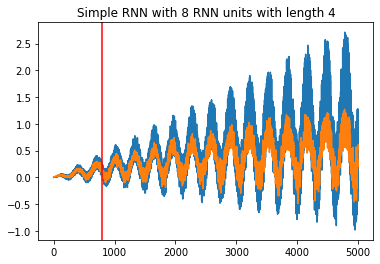

25/25 [==============================] - 1s 19ms/step - loss: 0.0077 - val_loss: 0.4243
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_19 (SimpleRNN)    (None, 16)                336       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 17        
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
50/50 [==============================] - 1s 2ms/step - loss: 0.0044
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 6/50
50/50 [================

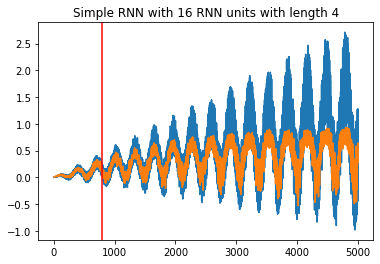

25/25 [==============================] - 1s 19ms/step - loss: 0.0207 - val_loss: 0.7107
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_20 (SimpleRNN)    (None, 32)                1184      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 33        
Total params: 1,217
Trainable params: 1,217
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
50/50 [==============================] - 1s 2ms/step - loss: 0.0059
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 6/50
50/50 [============

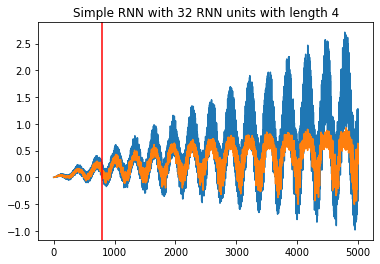

25/25 [==============================] - 1s 17ms/step - loss: 0.0096 - val_loss: 0.2736
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_21 (SimpleRNN)    (None, 64)                4416      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 65        
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
50/50 [==============================] - 1s 2ms/step - loss: 0.0043
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 6/50
50/50 [============

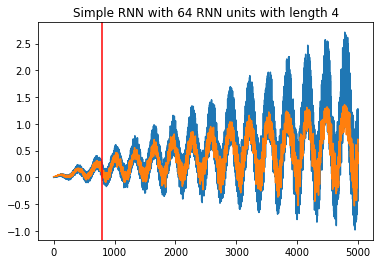

In [179]:
simpleRNN(8)
simpleRNN(16)
simpleRNN(32)
simpleRNN(64)

# Summary

64 nodes seem to perform optimally. 

b) Starting with length = 4, discuss how different choices of the length of the sequence fed
to the network can have an impact on performance.


          0
0  0.000000
1  0.000248
2  0.000559
3  0.000839
4  0.001622
(800, 1, 4) (800,)
25/25 [==============================] - 1s 18ms/step - loss: 0.0125 - val_loss: 0.3128
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_22 (SimpleRNN)    (None, 64)                4416      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 65        
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
50/50 [==============================] - 1s 3ms/step - loss: 0.0042
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 5/50
50/50 [

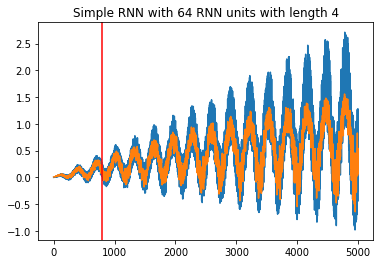

          0
0  0.000000
1  0.000052
2  0.000797
3  0.000811
4  0.000072
(800, 1, 4) (800,)
25/25 [==============================] - 1s 18ms/step - loss: 0.0045 - val_loss: 0.1825
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_23 (SimpleRNN)    (None, 64)                4416      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 65        
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
50/50 [==============================] - 1s 2ms/step - loss: 0.0039
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 5/50
50/50 [

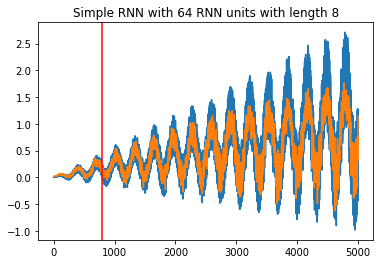

          0
0  0.000000
1  0.000337
2  0.000242
3  0.000357
4  0.001637
(800, 1, 4) (800,)
25/25 [==============================] - 1s 19ms/step - loss: 0.0064 - val_loss: 0.2252
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_24 (SimpleRNN)    (None, 64)                4416      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 65        
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
50/50 [==============================] - 1s 2ms/step - loss: 0.0038
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 5/50
50/50 [

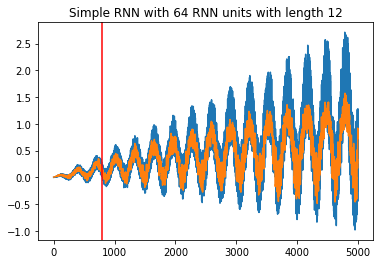

          0
0  0.000000
1  0.000111
2  0.000070
3  0.001046
4  0.000530
(800, 1, 4) (800,)
25/25 [==============================] - 1s 19ms/step - loss: 0.0083 - val_loss: 0.2469
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_25 (SimpleRNN)    (None, 64)                4416      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 65        
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
50/50 [==============================] - 1s 3ms/step - loss: 0.0035
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 5/50
50/50 [

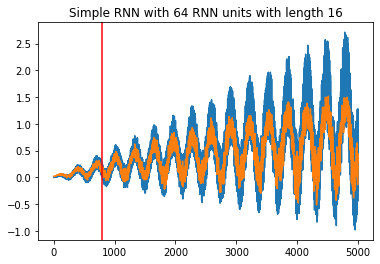

          0
0  0.000000
1  0.000380
2  0.000077
3  0.000717
4  0.000512
(800, 1, 4) (800,)
25/25 [==============================] - 1s 20ms/step - loss: 0.0072 - val_loss: 0.2519
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_26 (SimpleRNN)    (None, 64)                4416      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 65        
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
50/50 [==============================] - 1s 3ms/step - loss: 0.0041
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 5/50
50/50 [

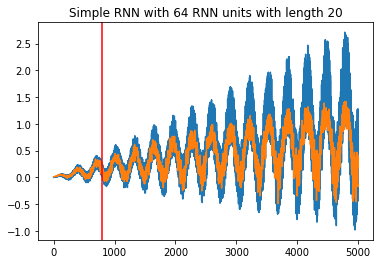

          0
0  0.000000
1  0.000261
2  0.000468
3  0.000083
4  0.000195
(800, 1, 4) (800,)
25/25 [==============================] - 1s 19ms/step - loss: 0.0044 - val_loss: 0.1895
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_27 (SimpleRNN)    (None, 64)                4416      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 65        
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
50/50 [==============================] - 1s 2ms/step - loss: 0.0036
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 5/50
50/50 [

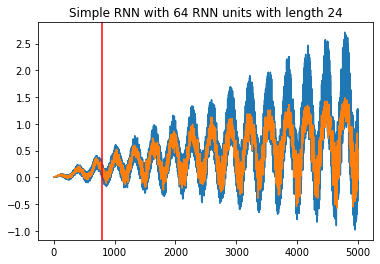

          0
0  0.000000
1  0.000237
2  0.000338
3  0.000904
4  0.000127
(800, 1, 4) (800,)
25/25 [==============================] - 1s 20ms/step - loss: 0.0093 - val_loss: 0.2588
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_28 (SimpleRNN)    (None, 64)                4416      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 65        
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
50/50 [==============================] - 1s 3ms/step - loss: 0.0043
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 5/50
50/50 [

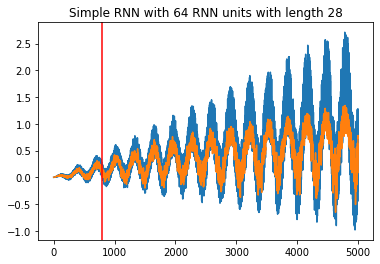

          0
0  0.000000
1  0.000263
2  0.000364
3  0.000193
4  0.000779
(800, 1, 4) (800,)
25/25 [==============================] - 2s 38ms/step - loss: 0.0050 - val_loss: 0.2041
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_29 (SimpleRNN)    (None, 64)                4416      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 65        
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
50/50 [==============================] - 1s 2ms/step - loss: 0.0041
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 5/50
50/50 [

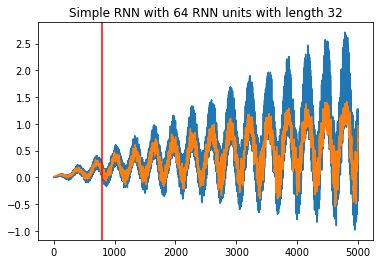

In [181]:
lengths = [4 * i for i in range(1, 9)]

for length in lengths:
  trainX, trainY, testX, testY = data_init(show_plot=False)
  simpleRNN(64, length)

  

# Summary

As the number of nodes stay consistent and the length increases, we begin to see the model perform worse. Likely, this is an indication that the RNN is overfitting.